# Submission Analysis
This notebook is meant to analyze and present some statistics of the submissions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from datetime import datetime as dtm
import os

In [4]:
tod = dtm.today().strftime("%Y%m%d")
tod

'20211126'

In [5]:
all_subm_folders = [f.path[3:] for f in os.scandir("../") if f.is_dir() if f.path[3:].isdigit()]
past_subm_folders = [f for f in all_subm_folders if dtm.strptime(f,"%Y%m%d").date() < dtm.today().date()]
past_subm_folders

['20211110', '20211027', '20211020', '20211117', '20211124', '20211103']

In [6]:
all_dfs = []
for folder in past_subm_folders:
    print(folder)
    df_paths = [f.path for f in os.scandir("../"+folder) if f.path[12:].startswith("2021")]
    week_dfs = []
    for dfp in df_paths:
        df = pd.read_csv(dfp)
        df["name"] = dfp[dfp.find("_")+1:-4]
        week_dfs.append(df)
    week_df = pd.concat(week_dfs)
    if "Unnamed: 0" in week_df.columns:
        week_df.drop(columns=["Unnamed: 0"], inplace=True)
    all_dfs.append(week_df)
df = pd.concat(all_dfs)
df.head()

20211110
20211027
20211020
20211117
20211124
20211103


forecast_date target horizon    q0.025     q0.25      q0.5     q0.75  \
0    2021-11-10    DAX   1 day -1.300921 -0.347593  0.064298  0.476189   
1    2021-11-10    DAX   2 day -1.254508 -0.271082  0.159424  0.589929   
2    2021-11-10    DAX   5 day -1.602475 -0.362460  0.195479  0.753418   
3    2021-11-10    DAX   6 day -1.573155 -0.305633  0.269961  0.845555   
4    2021-11-10    DAX   7 day -1.548988 -0.186005  0.432461  1.050926   

     q0.975       name  
0  1.429517  AryaStark  
1  1.573355  AryaStark  
2  1.993433  AryaStark  
3  2.113077  AryaStark  
4  2.413909  AryaStark

In [7]:
df_eval = pd.read_csv("../ptsfc_viz/plot_data/summary_eval.csv")
df_eval.head()

model target horizon        ae  mean_qscore  interval_coverage_0.5  \
0  AryaStark    DAX   1 day -0.024253     0.223847                   1.00   
1  AryaStark    DAX   2 day -0.002896     0.183268                   0.75   
2  AryaStark    DAX   5 day -0.088122     0.060054                   0.75   
3  AryaStark    DAX   6 day -0.051681    -0.128890                   0.25   
4  AryaStark    DAX   7 day -0.058464    -0.141433                   0.25   

   interval_coverage_0.95  n  scores_imputed  
0                    1.00  4               0  
1                    1.00  4               0  
2                    1.00  4               0  
3                    0.75  4               0  
4                    0.75  4               0

In [8]:
df_eval.horizon.unique()

array(['1 day', '2 day', '5 day', '6 day', '7 day', '36 hour', '48 hour',
       '60 hour', '72 hour', '84 hour', '[All]'], dtype=object)

In [9]:
df_eval[df_eval["horizon"] == "[All]"]

model       target horizon        ae  mean_qscore  \
375  AryaStark          DAX   [All] -0.053372    -0.030052   
376  AryaStark  temperature   [All] -0.203644    -0.236637   
377  AryaStark         wind   [All]  0.329199     0.384510   
378      Bronn          DAX   [All] -0.027315    -0.268500   
379      Bronn  temperature   [All] -0.221024    -0.476402   
..         ...          ...     ...       ...          ...   
445  wind_EMOS  temperature   [All] -5.012622    -6.171233   
446  wind_EMOS         wind   [All]  0.316437     0.379765   
447       Yoda          DAX   [All] -0.031258     0.064151   
448       Yoda  temperature   [All] -0.036436    -0.135676   
449       Yoda         wind   [All]  0.316437     0.379765   

     interval_coverage_0.5  interval_coverage_0.95   n  scores_imputed  
375               0.600000                0.600000  20               0  
376               0.400000                0.400000  15               0  
377               0.666667                0.666667  15               0  
378               0.800000                0.800000  20               2  
379               0.733333                0.733333  15               0  
..                     ...                     ...  ..             ...  
445               0.000000                0.000000  15              15  
446               0.666667                0.666667  15               0  
447               0.650000                0.650000  20               0  
448               0.600000                0.600000  15               0  
449               0.666667                0.666667  15               0  

[75 rows x 9 columns]

In [10]:
df_eval[df_eval["model"] == "DougJudy"]

model       target  horizon        ae  mean_qscore  \
75   DougJudy          DAX    1 day  0.030344     0.073062   
76   DougJudy          DAX    2 day  0.013787    -0.082157   
77   DougJudy          DAX    5 day  0.228312     0.143659   
78   DougJudy          DAX    6 day  0.068451     0.140234   
79   DougJudy          DAX    7 day  0.035840     0.122701   
80   DougJudy  temperature  36 hour -0.118861     0.127700   
81   DougJudy  temperature  48 hour  0.133159    -0.154710   
82   DougJudy  temperature  60 hour -0.363221    -0.654393   
83   DougJudy  temperature  72 hour -0.109897    -0.211776   
84   DougJudy  temperature  84 hour  0.075084    -0.202117   
85   DougJudy         wind  36 hour -0.215180    -0.500894   
86   DougJudy         wind  48 hour  0.614854     0.648462   
87   DougJudy         wind  60 hour  0.211276     0.291353   
88   DougJudy         wind  72 hour  0.463137     0.343261   
89   DougJudy         wind  84 hour -0.788538    -0.672917   
390  DougJudy          DAX    [All]  0.074264     0.100636   
391  DougJudy  temperature    [All] -0.069036    -0.168486   
392  DougJudy         wind    [All]  0.227070     0.216336   

     interval_coverage_0.5  interval_coverage_0.95   n  scores_imputed  
75                0.000000                0.000000   4               0  
76                1.000000                1.000000   4               0  
77                0.750000                1.000000   4               0  
78                0.500000                1.000000   4               0  
79                0.750000                1.000000   4               0  
80                0.666667                1.000000   3               0  
81                0.666667                1.000000   3               0  
82                0.333333                1.000000   3               0  
83                0.666667                0.666667   3               0  
84                0.666667                1.000000   3               0  
85                0.333333                0.666667   3               0  
86                0.666667                1.000000   3               0  
87                0.333333                1.000000   3               0  
88                0.666667                0.666667   3               0  
89                0.000000                0.666667   3               0  
390               0.600000                0.600000  20               0  
391               0.600000                0.600000  15               0  
392               0.400000                0.400000  15               0

<AxesSubplot:>

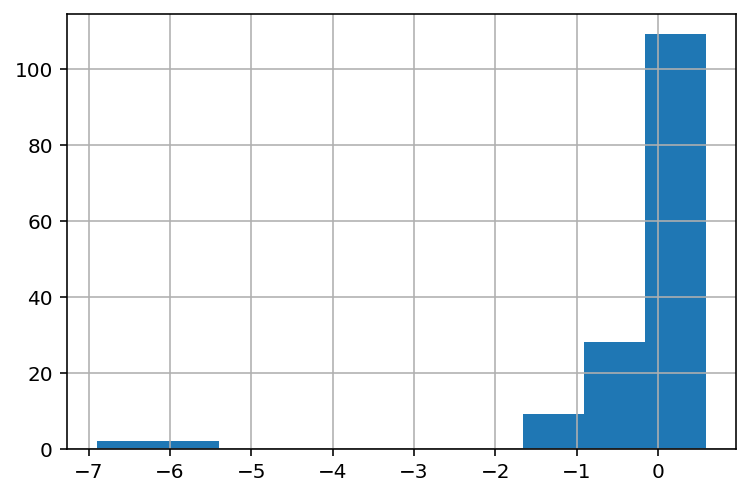

In [11]:
df_eval[df_eval["target"] == "DAX"]["ae"].hist()

In [12]:
df_eval.groupby(["target","horizon"]).mean()#.loc["wind"]["ae"].plot(kind="bar")

ae  mean_qscore  interval_coverage_0.5  \
target      horizon                                                 
DAX         1 day   -1.087504    -0.655645               0.790000   
            2 day   -0.196734    -0.092955               0.710000   
            5 day   -0.144944    -0.169768               0.610000   
            6 day   -0.125122    -0.237636               0.350000   
            7 day   -0.201225    -0.350003               0.410000   
            [All]   -0.214727    -0.279197               0.574000   
temperature 36 hour -0.603595    -0.503678               0.533333   
            48 hour -0.290018    -0.777876               0.573333   
            60 hour -1.451765    -2.012398               0.453333   
            72 hour -0.539477    -0.508777               0.373333   
            84 hour -0.888084    -1.301016               0.560000   
            [All]   -0.721353    -0.898955               0.498667   
wind        36 hour -0.418442    -0.974703               0.680000   
            48 hour  0.100831     0.092857               0.333333   
            60 hour -0.174408    -0.439943               0.600000   
            72 hour -0.070247     0.011989               0.506667   
            84 hour -1.089217    -0.901299               0.493333   
            [All]   -0.201825    -0.255639               0.522667   

                     interval_coverage_0.95     n  scores_imputed  
target      horizon                                                
DAX         1 day                  0.830000   4.0            0.44  
            2 day                  0.860000   4.0            0.44  
            5 day                  0.860000   4.0            0.44  
            6 day                  0.790000   4.0            0.56  
            7 day                  0.780000   4.0            0.56  
            [All]                  0.574000  20.0            2.44  
temperature 36 hour                0.813333   3.0            0.20  
            48 hour                0.920000   3.0            0.20  
            60 hour                0.893333   3.0            0.20  
            72 hour                0.853333   3.0            0.20  
            84 hour                0.880000   3.0            0.20  
            [All]                  0.498667  15.0            1.00  
wind        36 hour                0.853333   3.0            0.20  
            48 hour                0.800000   3.0            0.20  
            60 hour                0.853333   3.0            0.20  
            72 hour                0.800000   3.0            0.20  
            84 hour                0.786667   3.0            0.20  
            [All]                  0.522667  15.0            1.00

In [13]:
df["95_ci"] = df["q0.975"] - df["q0.025"]
df["50_ci"] = df["q0.75"] - df["q0.25"]

In [14]:
df["forecast_date"].unique()

array(['2021-11-10', '2021-10-27', '2021-10-20', '2021-11-17',
       '2021-11-24', '2021-11-03'], dtype=object)

In [15]:
benchmarks = df[df.name.str.contains("benchmark")]

In [16]:
df[df["target"] == "wind"]

forecast_date target  horizon    q0.025      q0.25       q0.5      q0.75  \
10    2021-11-10   wind  36 hour  3.362793   7.367092   9.494559  11.624732   
11    2021-11-10   wind  48 hour  0.491249   3.081247   5.047340   7.140468   
12    2021-11-10   wind  60 hour  3.588801   8.173587  10.618678  13.067843   
13    2021-11-10   wind  72 hour  2.824665   7.384584   9.861692  12.347859   
14    2021-11-10   wind  84 hour  3.812074   9.436621  12.466930  15.505577   
..           ...    ...      ...       ...        ...        ...        ...   
10    2021-11-03   wind  36 hour  8.450670  14.041036  16.974307  19.907579   
11    2021-11-03   wind  48 hour  4.353716  12.778465  17.198939  21.619414   
12    2021-11-03   wind  60 hour  9.240687  13.732148  16.088823  18.445497   
13    2021-11-03   wind  72 hour  5.790676  11.416094  14.367758  17.319421   
14    2021-11-03   wind  84 hour  9.636350  14.824388  17.546557  20.268727   

       q0.975       name      95_ci     50_ci  
10  15.686762  AryaStark  12.323969  4.257640  
11  11.248414  AryaStark  10.757165  4.059221  
12  17.738961  AryaStark  14.150160  4.894256  
13  17.093668  AryaStark  14.269003  4.963275  
14  21.303716  AryaStark  17.491643  6.068956  
..        ...        ...        ...       ...  
10  25.497945  Shaggydog  17.047274  5.866542  
11  30.044163  Shaggydog  25.690446  8.840950  
12  22.936958  Shaggydog  13.696272  4.713349  
13  22.944840  Shaggydog  17.154164  5.903327  
14  25.456765  Shaggydog  15.820415  5.444339  

[530 rows x 11 columns]

In [17]:
[x for x in df["name"].unique() if "benchmark" not in x]

['AryaStark',
 'GinaLinetti',
 'Joffrey_Baratheon',
 'Yoda',
 'CaptainRaymondHolt',
 'DougJudy',
 'HanSolo',
 'Shaggydog',
 'DexterJettster',
 'JabbaTheHutt',
 'mean_ensemble',
 'median_ensemble',
 'wind_EMOS',
 'PhoebeBuffay',
 'Joey',
 'GeneralGrievous',
 'ObiWanKenobi',
 'Bronn',
 'ChandlerBing',
 'UglyNakedGuy',
 't2m_EMOS',
 'SamwellTarly',
 'KyloRen',
 'HotPie',
 'RossGeller']

In [20]:
def compare_cols(df1,df2,cols):
    res = [True if df1[col] == df2[col] else False for col in cols]
    
def is_benchmark(data, benchmark):
    
    DATES = data["forecast_date"].unique()
    NAMES = data["name"].unique()
    TARGETS = ["wind", "temperature", "DAX"]
    
    QCOLS = ["q0.025", "q0.25", "q0.5", "q0.75", "q0.975"]
    Q_DIFF_COLS = ["d_q0.025", "d_q0.25", "d_q0.5", "d_q0.75", "d_q0.975"]
    
    for date in DATES:
        for name in NAMES:
            for target in TARGETS:
                diff = data.loc[(df["forecast_date"] == date) & (data["name"] == name) & (data["target"] == target), QCOLS].reset_index(drop=True) - benchmark.loc[(benchmark["forecast_date"] == date) & (benchmark["target"] == target),QCOLS].reset_index(drop=True)
                data.loc[(data["forecast_date"] == date) & (data["name"] == name) & (data["target"] == target),Q_DIFF_COLS] = diff.values

                
    data.reset_index(drop=True, inplace=True)
    data["diff_to_bm"] = data.apply(lambda x: x[Q_DIFF_COLS].abs().sum(), axis=1)
    data["is_benchmark"] = data.apply(lambda x: True if x["diff_to_bm"] < .1 else False, axis=1) #data.apply(lambda x: True if (x[Q_DIFF_COLS] == 0.).all() else False, axis=1)
    
    return data

In [21]:
df = is_benchmark(df, benchmarks)

In [143]:
pd.set_option('display.max_rows', 500)

In [22]:
df

forecast_date target  horizon    q0.025      q0.25       q0.5      q0.75  \
0       2021-11-10    DAX    1 day -1.300921  -0.347593   0.064298   0.476189   
1       2021-11-10    DAX    2 day -1.254508  -0.271082   0.159424   0.589929   
2       2021-11-10    DAX    5 day -1.602475  -0.362460   0.195479   0.753418   
3       2021-11-10    DAX    6 day -1.573155  -0.305633   0.269961   0.845555   
4       2021-11-10    DAX    7 day -1.548988  -0.186005   0.432461   1.050926   
...            ...    ...      ...       ...        ...        ...        ...   
1645    2021-11-03   wind  36 hour  8.450670  14.041036  16.974307  19.907579   
1646    2021-11-03   wind  48 hour  4.353716  12.778465  17.198939  21.619414   
1647    2021-11-03   wind  60 hour  9.240687  13.732148  16.088823  18.445497   
1648    2021-11-03   wind  72 hour  5.790676  11.416094  14.367758  17.319421   
1649    2021-11-03   wind  84 hour  9.636350  14.824388  17.546557  20.268727   

         q0.975       name      95_ci     50_ci  d_q0.025   d_q0.25    d_q0.5  \
0      1.429517  AryaStark   2.730438  0.823782  1.357522  0.130816 -0.009097   
1      1.573355  AryaStark   2.827863  0.861011  2.512079  0.461392  0.007160   
2      1.993433  AryaStark   3.595907  1.115877  3.127931  0.448574  0.033681   
3      2.113077  AryaStark   3.686232  1.151188  3.658875  0.627956  0.029973   
4      2.413909  AryaStark   3.962897  1.236931  4.137871  0.875101  0.057891   
...         ...        ...        ...       ...       ...       ...       ...   
1645  25.497945  Shaggydog  17.047274  5.866542 -0.429080  1.641036  2.889307   
1646  30.044163  Shaggydog  25.690446  8.840950 -4.035034  1.230965  3.273939   
1647  22.936958  Shaggydog  13.696272  4.713349 -0.961063  1.597148  2.738823   
1648  22.944840  Shaggydog  17.154164  5.903327 -1.712824  0.551094  2.447758   
1649  25.456765  Shaggydog  15.820415  5.444339  0.398350  2.149388  2.861557   

       d_q0.75  d_q0.975  diff_to_bm  is_benchmark  
0    -0.183293 -0.799951    2.480678         False  
1    -0.315854 -1.527732    4.824217         False  
2    -0.446220 -1.896894    5.953300         False  
3    -0.550765 -2.460997    7.328566         False  
4    -0.441142 -2.778328    8.290333         False  
...        ...       ...         ...           ...  
1645  3.937579  6.573945   15.470946         False  
1646  5.139414  8.094913   21.774265         False  
1647  4.077997  5.613958   14.988990         False  
1648  3.431921  6.656840   14.800437         False  
1649  4.141227  6.354765   15.905287         False  

[1650 rows x 18 columns]

In [23]:
df[df["is_benchmark"] == True][["forecast_date", "name", "target", "diff_to_bm"]]

forecast_date         name       target  diff_to_bm
20      2021-11-10  GinaLinetti  temperature         0.0
21      2021-11-10  GinaLinetti  temperature         0.0
22      2021-11-10  GinaLinetti  temperature         0.0
23      2021-11-10  GinaLinetti  temperature         0.0
24      2021-11-10  GinaLinetti  temperature         0.0
...            ...          ...          ...         ...
1610    2021-11-03  GinaLinetti  temperature         0.0
1611    2021-11-03  GinaLinetti  temperature         0.0
1612    2021-11-03  GinaLinetti  temperature         0.0
1613    2021-11-03  GinaLinetti  temperature         0.0
1614    2021-11-03  GinaLinetti  temperature         0.0

[251 rows x 4 columns]

<AxesSubplot:ylabel='Frequency'>

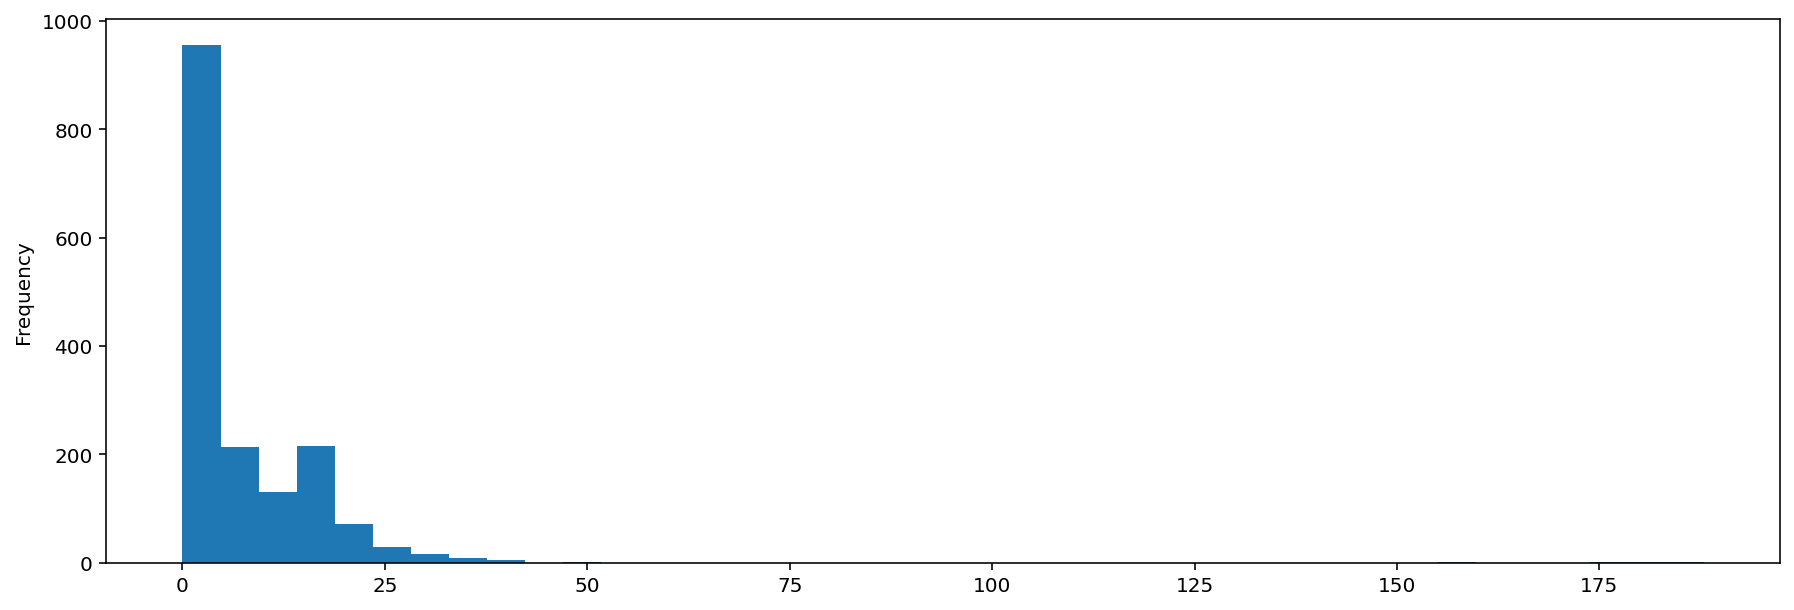

In [27]:
plt.figure(figsize=(15,5))
df["diff_to_bm"].plot(kind="hist", bins=40)

In [30]:
df["diff_to_bm"].sort_values()

404       0.00000
577       0.00000
1570      0.00000
576       0.00000
544       0.00000
          ...    
1618    157.20640
1617    175.18085
1615    182.67275
1619    186.75150
1616    187.95530
Name: diff_to_bm, Length: 1650, dtype: float64

In [31]:
df[df["diff_to_bm"] > 150]

forecast_date target  horizon   q0.025   q0.25    q0.5   q0.75   q0.975  \
1615    2021-11-03   wind  36 hour  31.9671  44.640  50.706  57.492  68.1264   
1616    2021-11-03   wind  48 hour  30.1995  41.571  50.130  59.328  79.0173   
1617    2021-11-03   wind  60 hour  36.7263  43.686  48.060  51.723  62.3628   
1618    2021-11-03   wind  72 hour  27.0126  39.114  42.912  49.995  58.6368   
1619    2021-11-03   wind  84 hour  33.2568  45.630  52.866  58.059  68.7672   

             name    95_ci   50_ci  d_q0.025  d_q0.25  d_q0.5  d_q0.75  \
1615  GinaLinetti  36.1593  12.852  23.08735  32.2400  36.621  41.5220   
1616  GinaLinetti  48.8178  17.757  21.81075  30.0235  36.205  42.8480   
1617  GinaLinetti  25.6365   8.037  26.52455  31.5510  34.710  37.3555   
1618  GinaLinetti  31.6242  10.881  19.50910  28.2490  30.992  36.1075   
1619  GinaLinetti  35.5104  12.429  24.01880  32.9550  38.181  41.9315   

      d_q0.975  diff_to_bm  is_benchmark  
1615  49.20240   182.67275         False  
1616  57.06805   187.95530         False  
1617  45.03980   175.18085         False  
1618  42.34880   157.20640         False  
1619  49.66520   186.75150         False

In [114]:
DATES = df["forecast_date"].unique()
NAMES = df["name"].unique()
TARGETS = ["wind", "temperature", "DAX"]

QCOLS = ["q0.025", "q0.25", "q0.5", "q0.75", "q0.975"]
Q_DIFF_COLS = ["d_q0.025", "d_q0.25", "d_q0.5", "d_q0.75", "d_q0.975"]

tmp = []

for date in DATES:
    for name in NAMES:
        for target in TARGETS:
            diff = df.loc[(df["forecast_date"] == date) & (df["name"] == name) & (df["target"] == target), QCOLS].reset_index(drop=True) - benchmarks.loc[(benchmarks["forecast_date"] == date) & (benchmarks["target"] == target),QCOLS].reset_index(drop=True)
            df.loc[(df["forecast_date"] == date) & (df["name"] == name) & (df["target"] == target),Q_DIFF_COLS] = diff.values
            
            tmp.append(diff.values)

df.reset_index(drop=True, inplace=True)

In [115]:
df[df["d_q0.5"] == 0]

forecast_date       target  horizon   q0.025    q0.25    q0.5    q0.75  \
20      2021-11-10  temperature  36 hour  7.17250   7.9475   8.840   9.2600   
21      2021-11-10  temperature  48 hour  2.70675   5.9975   6.820   7.5250   
22      2021-11-10  temperature  60 hour  6.11300   8.4450   9.505  10.1775   
23      2021-11-10  temperature  72 hour  1.87800   3.6475   4.030   4.7625   
24      2021-11-10  temperature  84 hour  6.06900   7.5575   8.685   9.5275   
...            ...          ...      ...      ...      ...     ...      ...   
1610    2021-11-03  temperature  36 hour  7.12725   7.4200   7.705   8.0250   
1611    2021-11-03  temperature  48 hour  6.76350   7.3625   7.990   8.2625   
1612    2021-11-03  temperature  60 hour  8.81375   9.3450   9.710   9.9450   
1613    2021-11-03  temperature  72 hour  5.02875   6.4600   6.965   7.3950   
1614    2021-11-03  temperature  84 hour  8.76500  10.0700  10.540  10.9600   

        q0.975         name  diff_to_bm  d_q0.025  d_q0.25  d_q0.5  d_q0.75  \
20     9.58800  GinaLinetti           0       0.0      0.0     0.0      0.0   
21     8.66100  GinaLinetti           0       0.0      0.0     0.0      0.0   
22    10.83550  GinaLinetti           0       0.0      0.0     0.0      0.0   
23     6.32325  GinaLinetti           0       0.0      0.0     0.0      0.0   
24    10.73575  GinaLinetti           0       0.0      0.0     0.0      0.0   
...        ...          ...         ...       ...      ...     ...      ...   
1610   8.57300  GinaLinetti           0       0.0      0.0     0.0      0.0   
1611   8.70275  GinaLinetti           0       0.0      0.0     0.0      0.0   
1612  10.63075  GinaLinetti           0       0.0      0.0     0.0      0.0   
1613   8.21900  GinaLinetti           0       0.0      0.0     0.0      0.0   
1614  11.76875  GinaLinetti           0       0.0      0.0     0.0      0.0   

      d_q0.975  
20         0.0  
21         0.0  
22         0.0  
23         0.0  
24         0.0  
...        ...  
1610       0.0  
1611       0.0  
1612       0.0  
1613       0.0  
1614       0.0  

[107 rows x 15 columns]

In [118]:
df.apply(lambda x: x[Q_DIFF_COLS], axis=1)

d_q0.025   d_q0.25    d_q0.5   d_q0.75  d_q0.975
0     1.357522  0.130816 -0.009097 -0.183293 -0.799951
1     2.512079  0.461392  0.007160 -0.315854 -1.527732
2     3.127931  0.448574  0.033681 -0.446220 -1.896894
3     3.658875  0.627956  0.029973 -0.550765 -2.460997
4     4.137871  0.875101  0.057891 -0.441142 -2.778328
...        ...       ...       ...       ...       ...
1645 -0.429080  1.641036  2.889307  3.937579  6.573945
1646 -4.035034  1.230965  3.273939  5.139414  8.094913
1647 -0.961063  1.597148  2.738823  4.077997  5.613958
1648 -1.712824  0.551094  2.447758  3.431921  6.656840
1649  0.398350  2.149388  2.861557  4.141227  6.354765

[1650 rows x 5 columns]

<AxesSubplot:>

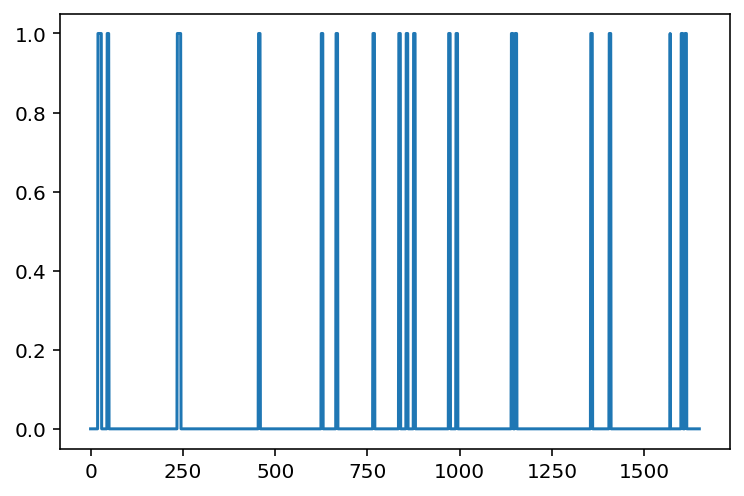

In [120]:
df.apply(lambda x: 1 if (x[Q_DIFF_COLS] == 0.).all() else 0, axis=1).plot()

In [100]:
(df[Q_DIFF_COLS] == 0.).

d_q0.025    106
d_q0.25     110
d_q0.5      107
d_q0.75     106
d_q0.975    105
dtype: int64

In [97]:
df.loc[(df[Q_DIFF_COLS] == 0.), Q_DIFF_COLS]

KeyError: "None of [Index([('d', '_', 'q', '0', '.', '0', '2', '5'),\n            ('d', '_', 'q', '0', '.', '2', '5'),\n                 ('d', '_', 'q', '0', '.', '5'),\n            ('d', '_', 'q', '0', '.', '7', '5'),\n       ('d', '_', 'q', '0', '.', '9', '7', '5')],\n      dtype='object')] are in the [index]"

In [ ]:
df[(df["forecast_date"] == date) & (df["name"] == name) & (df["target"] == target)][QCOLS].reset_index(drop=True) - benchmarks[(benchmarks["forecast_date"] == date) & (benchmarks["target"] == target)][QCOLS].reset_index(drop=True)

In [78]:
df.loc[(df["forecast_date"] == date) & (df["name"] == name) & (df["target"] == target), QCOLS].reset_index(drop=True) - benchmarks.loc[(benchmarks["forecast_date"] == date) & (benchmarks["target"] == target),QCOLS].reset_index(drop=True)

q0.025     q0.25      q0.5     q0.75    q0.975
0  0.948625  0.135643 -0.037470 -0.207853 -0.831606
1  1.373296  0.227704 -0.041320 -0.301594 -1.210552
2  1.743889  0.093641 -0.061208 -0.411576 -1.492839
3  1.873756  0.111792 -0.082244 -0.578922 -1.728551
4  1.737501  0.116347 -0.172336 -0.524852 -2.023452

In [73]:
tmp

[array([[-1.52270734,  1.28209204,  2.38955891,  3.51973178,  5.87126201],
        [-1.07650089,  0.06874665,  1.04733955,  2.06796761,  4.36366396],
        [-0.56044891,  1.76858669,  2.51867793,  3.18284274,  6.1554608 ],
        [-1.88583535, -0.27041639,  1.57169161,  3.20285861,  6.1739181 ],
        [-0.2941764 ,  1.92662143,  3.61193016,  3.31307729,  5.93996642]]),
 array([[-0.50086637,  0.35664528,  0.32072594,  0.75730661,  2.06181826],
        [ 0.94918428, -0.13461627,  0.20087255,  0.65386136,  1.72481082],
        [ 0.15866072,  0.04968504,  0.15610836,  0.65003167,  2.215056  ],
        [ 0.26500246,  0.27592615,  0.82761643,  1.02930672,  1.24898041],
        [-0.38704783,  0.36667243,  0.41566788,  0.74966332,  1.78363358]]),
 array([[ 1.35752152,  0.13081552, -0.00909733, -0.1832927 , -0.79995132],
        [ 2.51207908,  0.4613918 ,  0.00715971, -0.31585391, -1.52773244],
        [ 3.12793097,  0.44857449,  0.03368064, -0.44622007, -1.89689369],
        [ 3.65887489,

In [62]:
df[(df["forecast_date"] == DATES[0]) & (df["name"] == NAMES[0]) & (df["target"] == TARGETS[0])][QCOLS]

q0.025     q0.25       q0.5      q0.75     q0.975
10  3.362793  7.367092   9.494559  11.624732  15.686762
11  0.491249  3.081247   5.047340   7.140468  11.248414
12  3.588801  8.173587  10.618678  13.067843  17.738961
13  2.824665  7.384584   9.861692  12.347859  17.093668
14  3.812074  9.436621  12.466930  15.505577  21.303716

In [66]:
benchmarks[(benchmarks["forecast_date"] == DATES[0]) & (benchmarks["target"] == TARGETS[0])][QCOLS]

q0.025   q0.25   q0.5    q0.75    q0.975
0  4.88550  6.0850  7.105   8.1050   9.81550
1  1.56775  3.0125  4.000   5.0725   6.88475
2  4.14925  6.4050  8.100   9.8850  11.58350
3  4.71050  7.6550  8.290   9.1450  10.91975
4  4.10625  7.5100  8.855  12.1925  15.36375

In [69]:
df[(df["forecast_date"] == DATES[0]) & (df["name"] == NAMES[0]) & (df["target"] == TARGETS[0])][QCOLS].reset_index(drop=True) - benchmarks[(benchmarks["forecast_date"] == DATES[0]) & (benchmarks["target"] == TARGETS[0])][QCOLS].reset_index(drop=True)

q0.025     q0.25      q0.5     q0.75    q0.975
0 -1.522707  1.282092  2.389559  3.519732  5.871262
1 -1.076501  0.068747  1.047340  2.067968  4.363664
2 -0.560449  1.768587  2.518678  3.182843  6.155461
3 -1.885835 -0.270416  1.571692  3.202859  6.173918
4 -0.294176  1.926621  3.611930  3.313077  5.939966

In [36]:
benchmarks[benchmarks["target"] == "wind"]

forecast_date target  horizon    q0.025    q0.25    q0.5    q0.75    q0.975  \
0    2021-11-10   wind  36 hour   4.88550   6.0850   7.105   8.1050   9.81550   
1    2021-11-10   wind  48 hour   1.56775   3.0125   4.000   5.0725   6.88475   
2    2021-11-10   wind  60 hour   4.14925   6.4050   8.100   9.8850  11.58350   
3    2021-11-10   wind  72 hour   4.71050   7.6550   8.290   9.1450  10.91975   
4    2021-11-10   wind  84 hour   4.10625   7.5100   8.855  12.1925  15.36375   
0    2021-11-17   wind  36 hour  14.27400  15.7425  17.480  18.7500  20.25925   
1    2021-11-17   wind  48 hour  16.11750  18.3875  19.150  20.2575  21.05025   
2    2021-11-17   wind  60 hour  18.83750  19.5850  21.085  21.8625  22.80025   
3    2021-11-17   wind  72 hour  15.47475  16.5475  17.605  18.7550  19.95700   
4    2021-11-17   wind  84 hour  12.82375  16.4550  17.525  19.1175  21.80400   
0    2021-11-24   wind  36 hour   6.81850   9.1275   9.855  10.7025  11.78725   
1    2021-11-24   wind  48 hour   9.38300  11.3925  12.590  13.3700  14.57075   
2    2021-11-24   wind  60 hour   5.29150   8.9350  10.385  11.6550  14.86325   
3    2021-11-24   wind  72 hour   5.27850   8.1775   9.770  13.2025  17.56225   
4    2021-11-24   wind  84 hour   5.88925   9.6050  11.050  13.5700  17.49425   
0    2021-11-03   wind  36 hour   8.87975  12.4000  14.085  15.9700  18.92400   
1    2021-11-03   wind  48 hour   8.38875  11.5475  13.925  16.4800  21.94925   
2    2021-11-03   wind  60 hour  10.20175  12.1350  13.350  14.3675  17.32300   
3    2021-11-03   wind  72 hour   7.50350  10.8650  11.920  13.8875  16.28800   
4    2021-11-03   wind  84 hour   9.23800  12.6750  14.685  16.1275  19.10200   

             name  
0  wind_benchmark  
1  wind_benchmark  
2  wind_benchmark  
3  wind_benchmark  
4  wind_benchmark  
0  wind_benchmark  
1  wind_benchmark  
2  wind_benchmark  
3  wind_benchmark  
4  wind_benchmark  
0  wind_benchmark  
1  wind_benchmark  
2  wind_benchmark  
3  wind_benchmark  
4  wind_benchmark  
0  wind_benchmark  
1  wind_benchmark  
2  wind_benchmark  
3  wind_benchmark  
4  wind_benchmark

In [ ]:
for date in df["forecast_date"].unique():
    for target in df

In [24]:
#plt.figure(figsize=(12,10))
dfg = df.groupby(["forecast_date", "target"]).mean()#.plot(kind="bar")
dfg = dfg.reset_index(level=['target'])

<Figure size 720x1440 with 0 Axes>

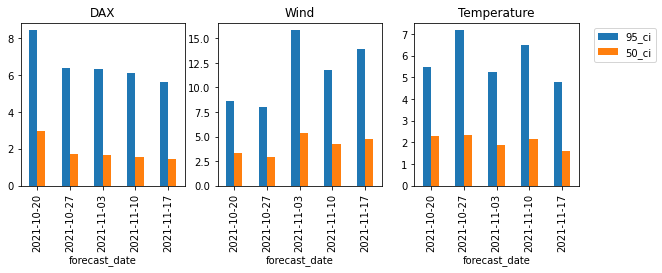

In [63]:
plt.figure(figsize=(10,20))
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10,3))
dfg[dfg.target == "DAX"][["95_ci", "50_ci"]].plot(kind="bar", 
                                                  ax=axes[0], 
                                                  legend=False,
                                                  title="DAX")

dfg[dfg.target == "wind"][["95_ci", "50_ci"]].plot(kind="bar", 
                                                   ax=axes[1], 
                                                   legend=False,
                                                   title="Wind")
dfg[dfg.target == "temperature"][["95_ci", "50_ci"]].plot(kind="bar", ax=axes[2],
                                                          title="Temperature")
axes[2].legend(bbox_to_anchor=(1.5, 1))

<AxesSubplot:xlabel='forecast_date'>

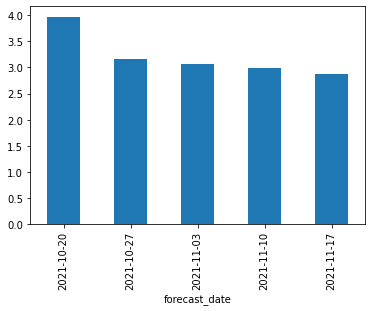

In [62]:
dfg[dfg.target == "DAX"]["q0.975"].plot(kind="bar")

In [81]:
wind_emos_results = df[df["name"] == "wind_EMOS"]

In [ ]:
wind_emos_results

In [79]:
# - x[x.name == "wind_EMOS"]
# x[[c for c in df.columns if c.startswith("q")]]
df.apply(lambda x: x[x["name"] == "wind_EMOS"], axis=1)

KeyError: False